# TP HMM 

In [52]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [157]:
v = np.loadtxt("data_txt_compact/matrice_symboles.txt")
A0 = np.loadtxt("data_txt_compact/A0.txt")
B0 = np.loadtxt("data_txt_compact/B0.txt")
A7 = np.loadtxt("data_txt_compact/A7.txt")
B7 = np.loadtxt("data_txt_compact/B7.txt")
A1 = np.loadtxt("data_txt_compact/A1.txt")
B1 = np.loadtxt("data_txt_compact/B1.txt")
vect_pi0 = np.loadtxt("data_txt_compact/vect_pi0.txt")

### 2.1 A quoi correspondent les zéros de la matrice B ? et ceux de la matrice A et du vecteur π ?

Les zéros de la matrice B correspondent à la probabilité 0 des observations de passer d'un état à un autre. 

Les zéros de la matrice A correspondent à la probabilité 0 de passer d'un état à un autre. 

Les zéros de la matrice pi correspondentau fait que l'état initial n'est pas à l'état i.

### 2.2 Génération de l'état suivant

In [146]:
def etat_suivant(i, A0): 
    cumsum = A0[i,:].cumsum()
    rand = random.uniform(0, 1)    
    plt.plot(range(len(cumsum)), cumsum, label="random generator")
    plt.plot([0,4],[rand, rand], label="cumsum")
    plt.legend()    
    for i in range(len(cumsum)): 
        if cumsum[i] >= rand: 
            return i
plt.show()

In [145]:
def seq_etats_f(A0):
    seq_etats = np.zeros(28)
    for i in range(28):
        seq_etats[i] = etat_suivant(seq_etats[i-1], A0)
    return seq_etats

In [153]:
def obs_suiv(B0, A0):
    seq_obs = []
    seq_etats = seq_etats_f(A0)
    for elem in seq_etats:
        cumsum = B0[:,elem].cumsum()
        rand = random.uniform(0, 1)
        for i in range(len(cumsum)): 
            if cumsum[i] >= rand: 
                seq_obs.append(i)
                break 
    return seq_obs


C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


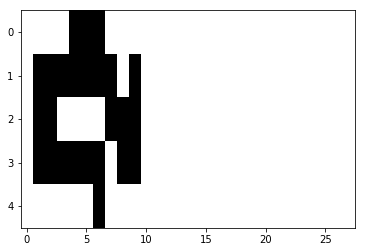

In [159]:
def plot_number(A0, B0):
    seq_etats = seq_etats_f(A0)
    seq_obs = obs_suiv(B0,A0)
    seq_obs = [elem + 1 for elem in seq_obs]
    im=[]
    plt.close()
    # les x contiennent les index dans le dictionnaire 
    for t in range (0,len(seq_etats)) : 
        im_col=v[:, seq_obs[t]-1]
        im.append(im_col)  

    im = np.array(im).T  # now make an array  
    plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto') 
    plt.show()
plot_number(A0, B0)

C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


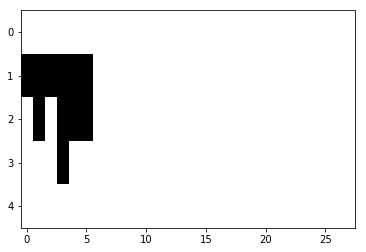

In [160]:
plot_number(A7, B7)

C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


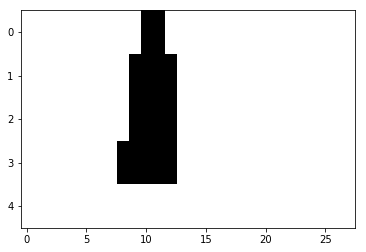

In [161]:
plot_number(A1, B1)

## Calcul de la vraisemblance de séquence d'observations

In [163]:
TestChiffres = np.loadtxt("data_txt_compact/SeqTest0.txt")
print(TestChiffres)
nex = 2
seq = TestChiffres[nex, :] 
seq[4] 

[[  1.   1.   1.   1.   1.   1.  14.  14.  14.  23.  12.  12.  12.  12.
   18.  18.  18.  18.  18.  18.  23.  23.  14.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   4.  14.  23.  23.  23.  23.  12.  12.  18.
   18.  18.  18.  18.  27.  23.  23.  11.   3.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   4.  14.  14.  23.  23.  23.  23.  23.  23.
   23.  23.  23.  23.  23.  23.  23.  11.  11.   4.   4.   1.   1.   1.]
 [  1.   1.   1.   1.   4.  14.  23.  23.  12.  12.  18.  18.  18.  18.
   18.  18.   9.  18.  18.  12.  23.  23.  11.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   1.  11.  11.  27.  27.  27.  27.  18.  18.
   18.  18.  12.   5.  14.  14.  23.  23.  11.  11.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   1.   1.  14.  14.  23.  27.  27.  18.  18.
   18.   9.  18.  18.  12.  23.  23.  23.   4.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.  14.  14.  14.  14.  23.  23.  23.  12.  12.
   12.  23.  23.  23.  23.  23.  11.  11.  11.  11.  11.  

1.0